**Ensemble classification (Boosting and bagging)**

The data set contains the data of 888 people who were on the Titanic when the disaster occurred.

Column names and types:

Survived: takes a value of 0 or 1, based on whether the person survived the disaster or not --> int64

Pclass: can take a value of 1, 2 or 3, based on the class the person traveled in --> int64

Name: contains the name of the given person --> object (string)

Sex: male or female. Gender of person --> object (string)

Age: person's age --> float64

Siblings/Spouses Aboard: shows how many siblings the given person has on board or whether they are traveling with a spouse --> int64

Parents/Children Aboard: shows how many of the person's parents/children are on board -->i nt64

Fare: how much did you pay for the ticket --> float64

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Create a DataFrame from an Excel file
titanic = pd.read_excel('/content/drive/MyDrive/datasets/Titanic.xlsx')

# Drop Name column
titanic.drop(labels='Name', axis=1, inplace=True)

# Conversion of the Sex column into a dummy variable (with reference coding)
titanic['Sex'] = pd.get_dummies(titanic['Sex'], drop_first=True)

# DataFrame is divided into PROPERTIES(features, X) and TARGET(target, y) arrays
X = titanic.iloc[:, 1:].values
y = titanic.iloc[:, 0].values.reshape(-1,1)

# Create training and test data with 2/3 and 1/3 cuts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

**Bagging**

Random forest

Creating a Random Forest classifier, fitting the model with default parameters and evaluating the classifier

In [4]:
# Create and fit a model
clf_rfc = RandomForestClassifier()
clf_rfc = clf_rfc.fit(X_train, y_train.ravel())

In [5]:
# Class tag "prediction"
y_pred_rfc = clf_rfc.predict(X_test)
print(y_pred_rfc)

[0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0
 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0]


In [6]:
print("Accuracy:", clf_rfc.score(X_test,y_test))

Accuracy: 0.8020477815699659


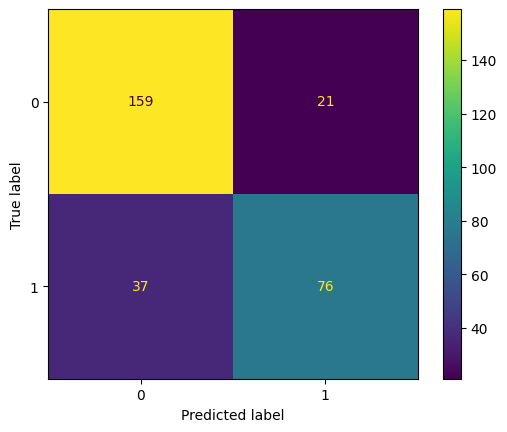

In [7]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc)
disp.plot()

In [8]:
#Let's try different parameter settings and evaluate the result!
clf_rfc2 = RandomForestClassifier(random_state=0,
                                  n_estimators=200,
                                  max_depth=2,
                                  criterion='entropy',
                                  min_samples_leaf=15)
clf_rfc2 = clf_rfc2.fit(X_train, y_train.ravel())
clf_rfc2.score(X_test,y_test)

0.764505119453925

0.8293515358361775


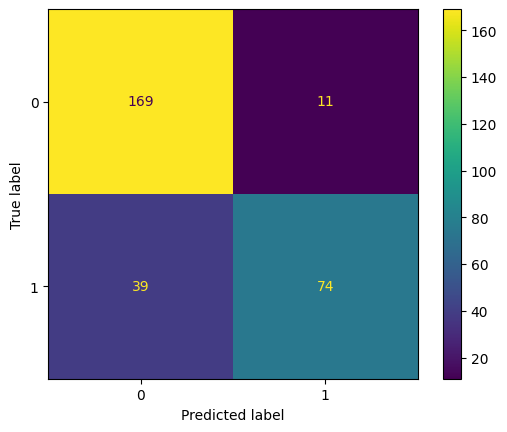

In [9]:
clf_rfc9 = RandomForestClassifier(n_estimators=40, random_state=0, criterion="entropy",  max_depth=5)
clf_rfc9 = clf_rfc9.fit(X_train, y_train.ravel())
print(clf_rfc9.score(X_test,y_test))

y_pred_rfc9 = clf_rfc9.predict(X_test)
cm_rfc9 = confusion_matrix(y_test, y_pred_rfc9)

cm_rfc9 = confusion_matrix(y_test, y_pred_rfc9)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rfc9)
disp.plot()

**Boosting**

[0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0
 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 1 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0
 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0
 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0]
Accuracy: 0.7986348122866894


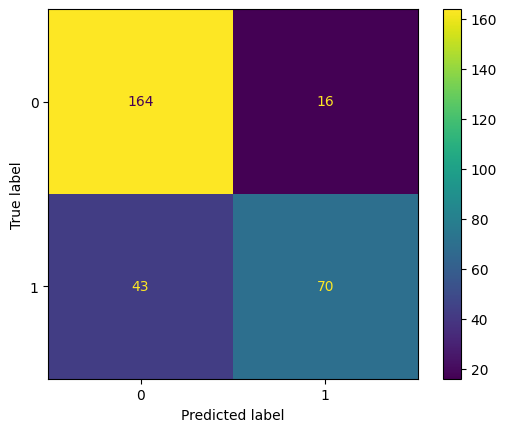

In [10]:
#Adaboost

clf_ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)
clf_ada = clf_ada.fit(X_train, y_train.ravel())

y_pred_ada = clf_ada.predict(X_test)
print(y_pred_ada)

print("Accuracy:", clf_ada.score(X_test,y_test))

cm_ada = confusion_matrix(y_test, y_pred_ada)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada)
disp.plot()

In [11]:
# Adaboost with SVC models
from sklearn.svm import SVC


clf_svc=SVC(probability=True, kernel='linear')

# AdaBoost classifier with SVC
clf_ada2 =AdaBoostClassifier(n_estimators=50, estimator=clf_svc,learning_rate=1)

# Train Adaboost Classifer
clf_ada2 = clf_ada2.fit(X_train, y_train.ravel())

#Predict the response for test dataset
y_pred_ada2 = clf_ada2.predict(X_test)

# Evaluation
print("Accuracy:", clf_ada2.score(X_test,y_test))

Accuracy: 0.6416382252559727


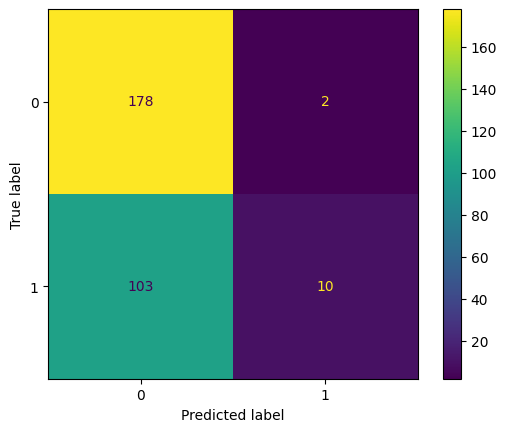

In [12]:
cm_ada2 = confusion_matrix(y_test, y_pred_ada2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada2)
disp.plot()

**Gradient boosting**

Accuracy: 0.8327645051194539


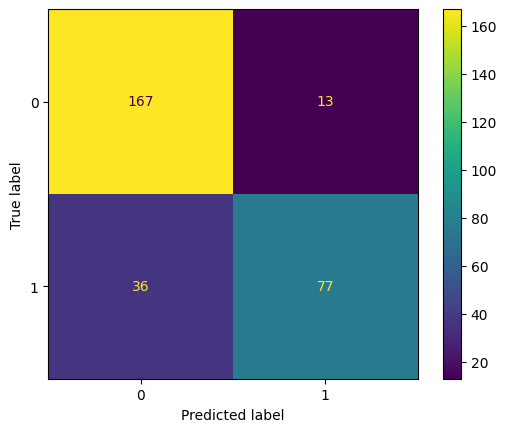

In [13]:
clf_gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
clf_gbc = clf_gbc.fit(X_train, y_train.ravel())

# class prediction"
y_pred_gbc = clf_gbc.predict(X_test)

# Evaluation
print("Accuracy:", clf_gbc.score(X_test,y_test))

cm_gbc = confusion_matrix(y_test, y_pred_gbc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gbc)
disp.plot()

In [14]:
# XGBoost
!pip install xgboost

In [15]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier()
clf_xgb = clf_xgb.fit(X_train, y_train)


y_pred_xgb = clf_xgb.predict(X_test)


print("Accuracy:", clf_xgb.score(X_test,y_test))

Accuracy: 0.8088737201365188


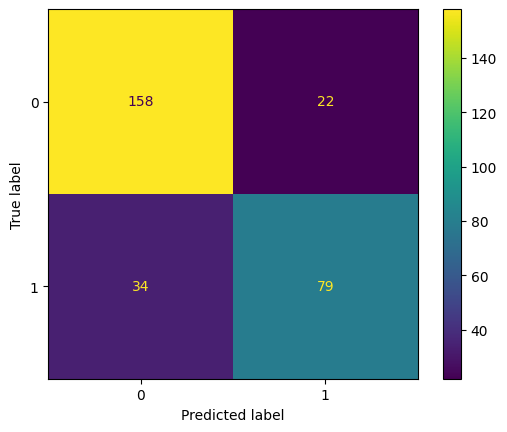

In [16]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot()

In [17]:
# Light GBM
!pip install lightgbm

In [18]:
import lightgbm as lgb

clf_lgb = lgb.LGBMClassifier(boosting ='dart', learning_rate=0.05, min_data_in_leaf=20, feature_fraction=0.7, num_leaves=41,
                             metric='binary_logloss', drop_rate=0.15, verbose=-100)
clf_lgb = clf_lgb.fit(X_train, y_train.ravel())


y_pred_lgb = clf_lgb.predict(X_test)


print("Accuracy:", clf_lgb.score(X_test,y_test))

Accuracy: 0.8293515358361775


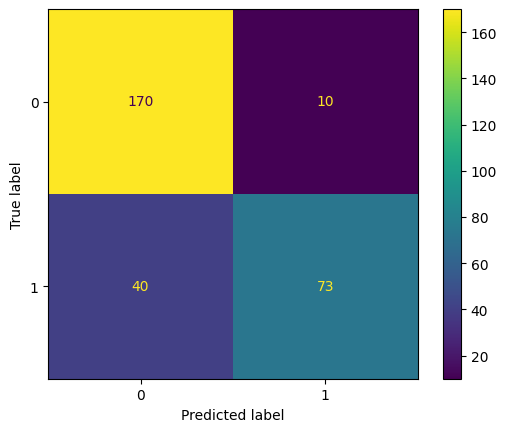

In [19]:
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lgb)
disp.plot()